# Runge-Kutta Practice

In [2]:
import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

## Introduction
The purpose of this assigment is to practice numerical solution using Runge-Kutta methods. In particular, you will implement the solvers and explore how different orders of RK solution differ in their accuracy.

Recall that the general $s$-order RK solution for a differential equation $\dot{x} = f(t, x)$ of is given by

$$
x_{n+1} = x_n + \epsilon \sum_{j = 1}^s b_j k_j\,,
$$
where $\epsilon$ is the time step and $k_j$, referred to as "stages", are given by
$$
k_j = f\left(t_n + c_j \epsilon, x_n + \epsilon\sum_{l = 1}^{j - 1} a_{jl}k_l\right)\,.
$$
The relevant coefficients are commonly organized in a table form, referred to as the **Butcher's tableaus**:

$$
\begin{array}{c|cccc}
c_1 &  &  &  &  \\
c_2 & a_{2,1} & & &  \\
c_3 &  a_{3,1} & a_{3,2} &  &  \\
\vdots & \vdots & \vdots & \ddots &  \\
c_s & a_{s,1} & a_{s,2} & \dots & a_{s,s-1} \\
\hline
 & b_1 & b_2 & \dots& b_{s-1} & b_s \\
\end{array}
$$
with $c_1 = 0$.

Euler's method can, in fact, also be written using the tableau form:

$$
\begin{array}{c|cccc}
0 &   \\
\hline
 & 1 
\end{array}
$$

The second order Runge-Kutta method, derived in class, is given by

$$
\begin{array}{c|cccc}
0 &  &   \\
1 & 1 &   \\
\hline
 & 1/2 & 1/2 \\
\end{array}
$$

while the fourth order is

$$
\begin{array}{c|cccc}
0 &  &  &  &  \\
1/2 & 1/2 & & &  \\
1/2 &  0 & 1/2 &  &  \\
1 & 0 & 0 & 1 &  \\
\hline
 & 1/6 & 1/3 & 1/3& 1/6  \\
\end{array}
$$

### Problem 1

Write three Runge-Kutta step functions, named ```RK1_step```, ```RK2_step```, and ```RK4_step``` which take four arguments: $f(t,x)$, $x_n$, $t$, and $\epsilon$, and return $x_{n+1}$. For each of the functions, use the corresponding tableau.

In [3]:
def RK1_step(f, x, t, epsilon):
    k1 = f(t, x)
    return (x + epsilon * k1)

def RK2_step(f, x, t, epsilon):
    k1 = f(t, x)
    k2 = f(t + epsilon, x + epsilon * k1)
    return (x + epsilon * (k1 + k2) / 2)

def RK4_step(f, x, t, epsilon):
    k1 = f(t, x)
    k2 = f(t + epsilon / 2, x + epsilon * k1 / 2)
    k3 = f(t + epsilon / 2, x + epsilon * k2 / 2)
    k4 = f(t + epsilon, x + epsilon * k3)
    return (x + epsilon * (k1 + 2 * k2 + 2 * k3 + k4) / 6)

### Problem 2

To make sure that your methods work, it is always good to take a differential equation that you can easily solve and see that the numerical results agree with the analytics. Choose a nice autonomous equation (maybe $\dot{x} = a\times x$), solve it analytically and then plot the solution along with the numerical results from the 3 RK methods above.

**Important:** when plotting, make sure to include the legend so that the reader knows what you are doing. Comment on what you observe! What happens when you change the time step size?

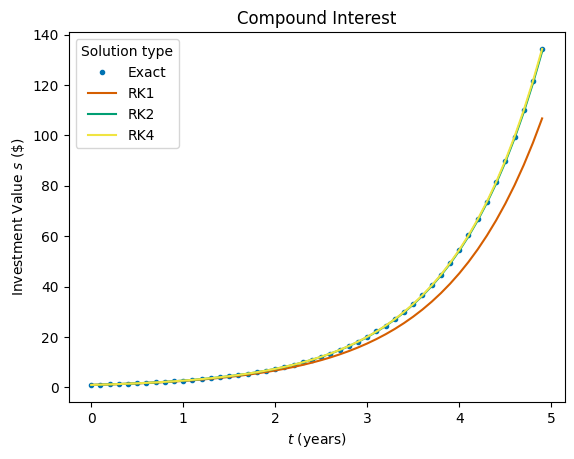

In [18]:
r = 1
s0 = 1

t_max = 5
epsilon = 0.1
n_pts = int(np.floor(t_max / epsilon))

def derivative(t, x):
    return r * x

# Exact solution
ts = np.arange(0, n_pts) * epsilon
s_exact = [(s0 * np.exp(r * t)) for t in ts]

# RK1
s_rk1 = [0] * n_pts
s_rk1[0] = s0
for step in range(1, n_pts):
    s_rk1[step] = RK1_step(derivative, s_rk1[step - 1], 0, epsilon)

# RK2
s_rk2 = [0] * n_pts
s_rk2[0] = s0
for step in range(1, n_pts):
    s_rk2[step] = RK2_step(derivative, s_rk2[step - 1], 0, epsilon)

# RK4
s_rk4 = [0] * n_pts
s_rk4[0] = s0
for step in range(1, n_pts):
    s_rk4[step] = RK4_step(derivative, s_rk4[step - 1], 0, epsilon)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(ts, s_exact, color = CF_blue, label = "Exact", linestyle = "", marker = ".")
ax.plot(ts, s_rk1, color = CF_vermillion, label = "RK1")
ax.plot(ts, s_rk2, color = CF_green, label = "RK2")
ax.plot(ts, s_rk4, color = CF_yellow, label = "RK4")
ax.set(xlabel = "$t$ (years)", ylabel = "Investment Value $s$ (\$)", title = "Compound Interest")
ax.legend(title = "Solution type")

### Problem 3

With the machinery established and working, let us solve a real problem: a driven and damped harmonic oscillator. For some terminology:
* Driven means that there is a periodic external force acting on the oscillator making it go back and forth. The period of the force does *not* have to be the same as the oscillators!
* Damped means there is drag and the oscillator loses energy. We will assume that the drag is proportional to speed.

The equation of motion describing the oscillator is

$$
\ddot{x} = -x - \gamma \dot{x} + F\sin(\Omega t)\,.
$$

You will be familiar with the first two terms ($\ddot{x}$ and $-x$) as they describe the harmonic oscillator that we encountered in class. The second term on the right hand side is the *drag*: it is proportional to and pointing in the opposite direction of $\dot{x}$, the oscillator's velocity. $\gamma \geq 0$ gives the magnitude of the drag.

The last term is the periodic force. Note that the problem is not autonomous!


#### Part A

For this problem, we will assume that the force is applied for some time interval starting at $t = 0$ and lasting until $t = T$. Write down a function called ```driving_force``` which returns $F \sin(\Omega t)$ if $0<t<T$ and zero otherwise. You might need to define $F$, $\Omega$, and $T$! Plot the result to check that everything works fine.

NOTE: the period of your applied force is $2\pi \Omega$. Use this as a check!

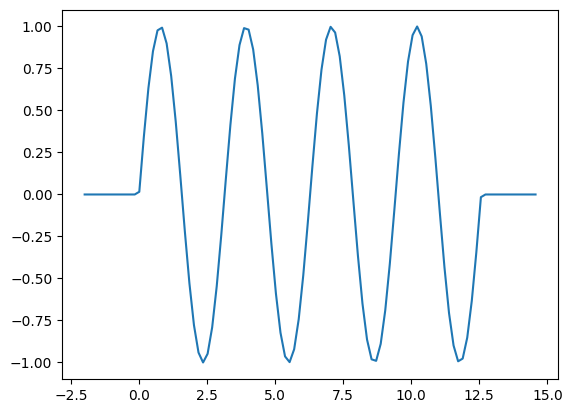

In [29]:
F = 1
omega = 2
T = 2 * np.pi * omega

def driving_force(t):
    return F * np.sin(omega * t) if (t > 0 and t < T) else 0

ts = np.linspace(-2, T + 2, 100)
dfs = [driving_force(t) for t in ts]
plt.plot(ts, dfs)


#### Part B

With the force working, write down a derivative function for the oscillator. You will need to define $\gamma$ first! Put your definition of the driving force in the same code block so you have an easier time adjusting the constants.

#### Part C

Switch off the drag and the driving force. Initialize your oscillator at zero speed and finite displacement. Use RK4 to solve the differential equation for some range of time. The exact result is known so your goal here is to make sure your functions work as intended. Comment on your results. Why do you think that they are correct?

#### Part D

Keeping the driving force off, introduce drag. Obviously, you have to initialize your system with some initial energy, so start with zero speed and some finite displacement.

Play with the value of $\gamma$ to see how the QUALITATIVE picture changes. **HINT:** something happens when $\gamma$ crosses 2. Make several plots and discuss what you see.

#### Part E

Remove drag and introduce the driving force. Here, you can initialize your oscillator at zero position and velocity. How down the behavior of the system change with $\Omega$ and $T$? What happens when $\Omega = 1$? What happens after the force is switched off?

#### Part F

Finally, introduce both driving and drag. Play with the parameters and provide a qualitative explanation of what you observe.